# Simulation and calculation of the convex hull
# Convex hull as diagnostic tool in single-molecule localization microscopy
## updated last: 05.11.2021

In [1]:
import sys
sys.path.append("C:\\Users\\Sagix\\Desktop\\Masterarbeit\\Python_files")

In [2]:
import importlib
import functions.non_locan.convex_hull as ch
importlib.reload(ch)
import numpy as np
from matplotlib import pyplot as plt

# 2D cases

In [46]:
n_max_points = 100
seed = np.random.default_rng(100)
n_simulations = 1000
sigma = 1

array_n_points = np.arange(3, n_max_points+1, 1)

## Perimeter convex hull

In [47]:
array_sim_peris_2d_sigma1 = ch.sim_peri_convex_hull_2d(n_max_points, seed, n_simulations, sigma)

std_high_peri_2d_sigma1, std_low_peri_2d_sigma1, mean_peri_2d_sigma1 = \
ch.sided_deviations(array_sim_peris_2d_sigma1)

std_high_peri_2d_sigma1_norm = std_high_peri_2d_sigma1
std_low_peri_2d_sigma1_norm = std_low_peri_2d_sigma1
mean_peri_2d_sigma1_norm = mean_peri_2d_sigma1

In [48]:
array_sim_peris_2d_sigma9 = ch.sim_peri_convex_hull_2d(n_max_points, seed, n_simulations, sigma=9)

std_high_peri_2d_sigma9, std_low_peri_2d_sigma9, mean_peri_2d_sigma9 = \
ch.sided_deviations(array_sim_peris_2d_sigma9)

std_high_peri_2d_sigma9_norm = std_high_peri_2d_sigma9 / 9
std_low_peri_2d_sigma9_norm = std_low_peri_2d_sigma9 / 9
mean_peri_2d_sigma9_norm = mean_peri_2d_sigma9 / 9

#### Mean perimeter per n, normalized to $\sigma$ = 1

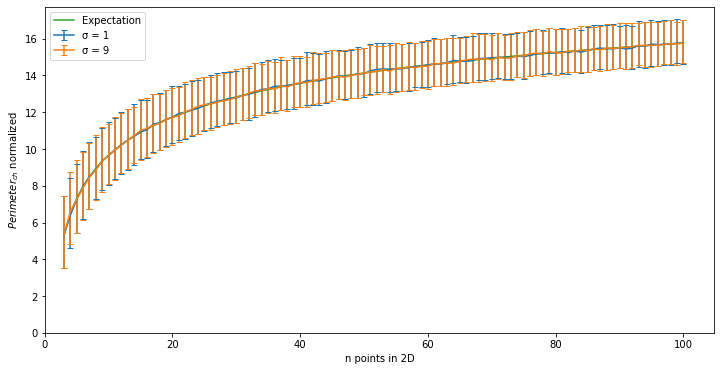

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(x=array_n_points, y=mean_peri_2d_sigma1_norm, yerr=[std_low_peri_2d_sigma1_norm, 
                                                                std_high_peri_2d_sigma1_norm], 
            label="\N{greek small letter sigma} = " + str(1), capsize=3)
ax.errorbar(x=array_n_points, y=mean_peri_2d_sigma9_norm, yerr=[std_low_peri_2d_sigma9_norm,
                                                                std_high_peri_2d_sigma9_norm],
            label="\N{greek small letter sigma} = " + str(9), capsize=3)
ax.plot(array_n_points, ch.calc_peri_convex_hull_2d_pt2(1, array_n_points), label="Expectation")
ax.legend()
ax.set_ylim(0,)
ax.set_xlim(0,)
ax.set_ylabel(r"$Perimeter_{ch}$ normalized")
ax.set_xlabel("n points in 2D");

#### Histogram of simulated perimeter values relative to expected value

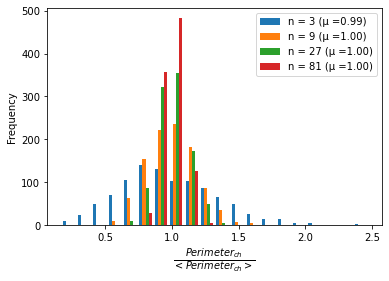

In [50]:
fig, ax = plt.subplots()

labels=[]
ratios = []
for i in range(1, 5, 1):
    k = 3**i
    ratio = array_sim_peris_2d_sigma1[k-3]/ch.calc_peri_convex_hull_2d_pt2(1, k)
    label = "n = " + str(k) + " (µ =" + "{0:.2f}".format(np.mean(ratio)) + ")"
    labels.append(label)
    ratios.append(ratio)
ax.hist(x=ratios, label=labels, bins=20)
ax.legend()
ax.set_xlabel(r"$\frac{Perimeter_{ch}}{<Perimeter_{ch}>}$", fontsize=14)
ax.set_ylabel("Frequency");

## Area convex hull

In [51]:
array_sim_areas_2d_sigma1 = ch.sim_area_convex_hull_2d(n_max_points, seed, n_simulations, sigma)

std_high_area_2d_sigma1, std_low_area_2d_sigma1, mean_area_2d_sigma1 = \
ch.sided_deviations(array_sim_areas_2d_sigma1)

std_high_area_2d_sigma1_norm = std_high_area_2d_sigma1
std_low_area_2d_sigma1_norm = std_low_area_2d_sigma1
mean_area_2d_sigma1_norm = mean_area_2d_sigma1

In [52]:
array_sim_areas_2d_sigma9 = ch.sim_area_convex_hull_2d(n_max_points, seed, n_simulations, sigma=9)

std_high_area_2d_sigma9, std_low_area_2d_sigma9, mean_area_2d_sigma9 = \
ch.sided_deviations(array_sim_areas_2d_sigma9)

std_high_area_2d_sigma9_norm = std_high_area_2d_sigma9 / 9**2
std_low_area_2d_sigma9_norm = std_low_area_2d_sigma9 / 9**2
mean_area_2d_sigma9_norm = mean_area_2d_sigma9 / 9**2

#### Mean area per n, normalized to $\sigma$ = 1

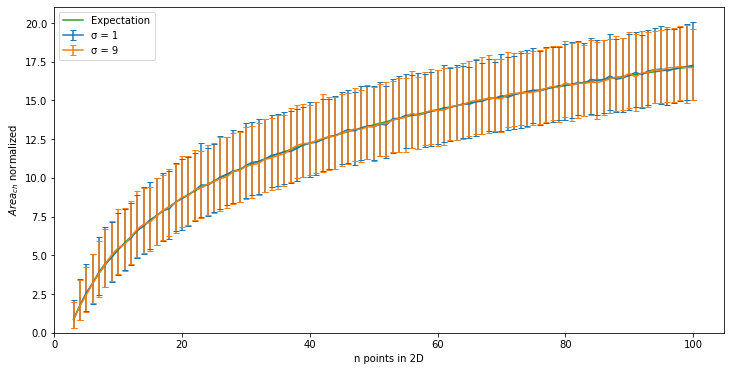

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(x=array_n_points, y=mean_area_2d_sigma1_norm, yerr=[std_low_area_2d_sigma1_norm, 
                                                                std_high_area_2d_sigma1_norm], 
            label="\N{greek small letter sigma} = " + str(1), capsize=3)
ax.errorbar(x=array_n_points, y=mean_area_2d_sigma9_norm, yerr=[std_low_area_2d_sigma9_norm,
                                                                std_high_area_2d_sigma9_norm],
            label="\N{greek small letter sigma} = " + str(9), capsize=3)
ax.plot(array_n_points, ch.calc_area_convex_hull_2d_pt2(1, array_n_points), label="Expectation")
ax.legend()
ax.set_ylim(0,)
ax.set_xlim(0,)

ax.set_ylabel(r"$Area_{ch}$ normalized")
ax.set_xlabel("n points in 2D");

#### Histogram of simulated area values relative to expected value

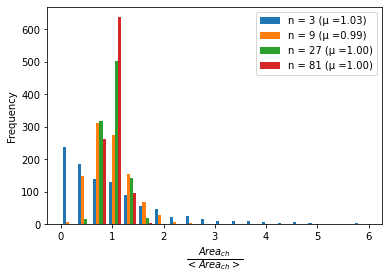

In [54]:
fig, ax = plt.subplots()

labels=[]
ratios = []
for i in range(1, 5, 1):
    k = 3**i
    ratio = array_sim_areas_2d_sigma1[k-3]/ch.calc_area_convex_hull_2d_pt2(1, k)
    label = "n = " + str(k) + " (µ =" + "{0:.2f}".format(np.mean(ratio)) + ")"
    labels.append(label)
    ratios.append(ratio)
ax.hist(x=ratios, label=labels, bins=20)
ax.legend()
ax.set_xlabel(r"$\frac{Area_{ch}}{<Area_{ch}>}$", fontsize=14)
ax.set_ylabel("Frequency");

# 3D cases

In [4]:
n_max_points = 100
seed = np.random.default_rng(100)
n_simulations = 1000
sigma_xy = 1
sigma_z = 1

array_n_points = np.arange(4, n_max_points+1, 1)

## Surface Area convex hull

In [56]:
array_sim_areas_3d_sigma1 = ch.sim_area_convex_hull_3d(n_max_points, seed, n_simulations, sigma_xy, sigma_z)

std_high_area_3d_sigma1, std_low_area_3d_sigma1, mean_area_3d_sigma1 = \
ch.sided_deviations(array_sim_areas_3d_sigma1)

std_high_area_3d_sigma1_norm = std_high_area_3d_sigma1
std_low_area_3d_sigma1_norm = std_low_area_3d_sigma1
mean_area_3d_sigma1_norm = mean_area_3d_sigma1

In [57]:
array_sim_areas_3d_sigma_xy3_sigma_z7 = ch.sim_area_convex_hull_3d(n_max_points, seed, n_simulations, 3, 7)

std_high_area_3d_sigma_xy3_sigma_z7, std_low_area_3d_sigma_xy3_sigma_z7, mean_area_3d_sigma_xy3_sigma_z7 = \
ch.sided_deviations(array_sim_areas_3d_sigma_xy3_sigma_z7)

factor = ch.calc_factor(3, 7)
std_high_area_3d_sigma_xy3_sigma_z7_norm = std_high_area_3d_sigma_xy3_sigma_z7 / factor
std_low_area_3d_sigma_xy3_sigma_z7_norm = std_low_area_3d_sigma_xy3_sigma_z7 / factor
mean_area_3d_sigma_xy3_sigma_z7_norm = mean_area_3d_sigma_xy3_sigma_z7 / factor

#### Mean surface area per n, normalized to $\sigma$ = 1

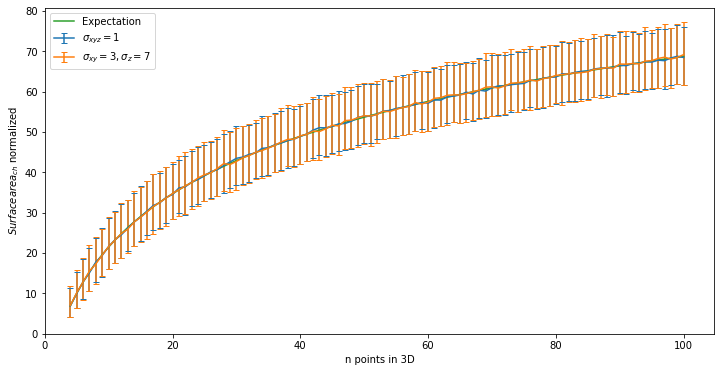

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(x=array_n_points, y=mean_area_3d_sigma1_norm, yerr=[std_low_area_3d_sigma1_norm, 
                                                                std_high_area_3d_sigma1_norm], 
            label=r"$\sigma_{xyz} = 1$", capsize=3)
ax.errorbar(x=array_n_points, y=mean_area_3d_sigma_xy3_sigma_z7_norm, 
            yerr=[std_low_area_3d_sigma_xy3_sigma_z7_norm, std_high_area_3d_sigma_xy3_sigma_z7_norm],
            label=r"$\sigma_{xy} = 3, \sigma_{z} = 7$", capsize=3)
ax.plot(array_n_points, ch.calc_area_convex_hull_3d_pt2(1, 1, array_n_points), label="Expectation")
ax.legend()
ax.set_ylim(0,)
ax.set_xlim(0,)
ax.set_ylabel(r"$Surface area_{ch}$ normalized")
ax.set_xlabel("n points in 3D");

#### Histogram of simulated surface area values relative to expected value

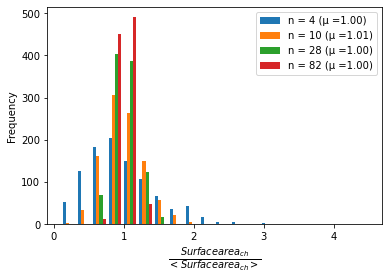

In [59]:
fig, ax = plt.subplots()

labels=[]
ratios = []
for i in range(1, 5, 1):
    k = 3**i+1
    ratio = array_sim_areas_3d_sigma1[k-4]/ch.calc_area_convex_hull_3d_pt2(1, 1, k)
    label = "n = " + str(k) + " (µ =" + "{0:.2f}".format(np.mean(ratio)) + ")"
    labels.append(label)
    ratios.append(ratio)
ax.hist(x=ratios, label=labels, bins=20)
ax.legend()
ax.set_xlabel(r"$\frac{Surface area_{ch}}{<Surface area_{ch}>}$", fontsize=14)
ax.set_ylabel("Frequency");

## Volume convex hull

In [5]:
array_sim_volumes_3d_sigma1 = ch.sim_volume_convex_hull_3d(n_max_points, seed, n_simulations, sigma_xy, sigma_z)

std_high_volume_3d_sigma1, std_low_volume_3d_sigma1, mean_volume_3d_sigma1 = \
ch.sided_deviations(array_sim_volumes_3d_sigma1)

std_high_volume_3d_sigma1_norm = std_high_volume_3d_sigma1
std_low_volume_3d_sigma1_norm = std_low_volume_3d_sigma1
mean_volume_3d_sigma1_norm = mean_volume_3d_sigma1

In [6]:
array_sim_volumes_3d_sigma_xy3_sigma_z7 = ch.sim_volume_convex_hull_3d(n_max_points, seed, n_simulations, 3, 7)

std_high_volume_3d_sigma_xy3_sigma_z7, std_low_volume_3d_sigma_xy3_sigma_z7, mean_volume_3d_sigma_xy3_sigma_z7 = \
ch.sided_deviations(array_sim_volumes_3d_sigma_xy3_sigma_z7)

std_high_volume_3d_sigma_xy3_sigma_z7_norm = std_high_volume_3d_sigma_xy3_sigma_z7 / (3**2 * 7)
std_low_volume_3d_sigma_xy3_sigma_z7_norm = std_low_volume_3d_sigma_xy3_sigma_z7 / (3**2 * 7)
mean_volume_3d_sigma_xy3_sigma_z7_norm = mean_volume_3d_sigma_xy3_sigma_z7 / (3**2 * 7)

#### Mean volume per n, normalized to $\sigma$ = 1

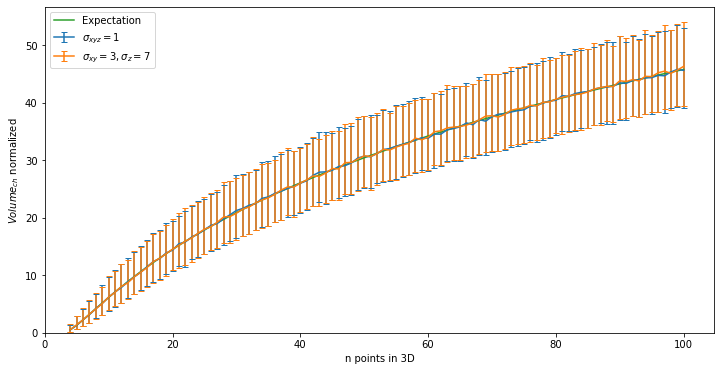

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(x=array_n_points, y=mean_volume_3d_sigma1_norm, yerr=[std_low_volume_3d_sigma1_norm, 
                                                                  std_high_volume_3d_sigma1_norm], 
            label=r"$\sigma_{xyz} = 1$", capsize=3)
ax.errorbar(x=array_n_points, y=mean_volume_3d_sigma_xy3_sigma_z7_norm, 
            yerr=[std_low_volume_3d_sigma_xy3_sigma_z7_norm, std_high_volume_3d_sigma_xy3_sigma_z7_norm],
            label=r"$\sigma_{xy} = 3, \sigma_{z} = 7$", capsize=3)
ax.plot(array_n_points, ch.calc_volume_convex_hull_3d_pt2(1, 1, array_n_points), label="Expectation")
ax.legend()
ax.set_ylim(0,)
ax.set_xlim(0,)
ax.set_ylabel(r"$Volume_{ch}$ normalized")
ax.set_xlabel("n points in 3D");

#### Histogram of simulated volume values relative to expected value

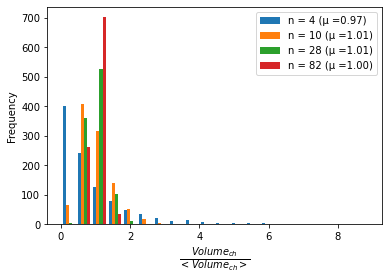

In [8]:
fig, ax = plt.subplots()

labels=[]
ratios = []
for i in range(1, 5, 1):
    k = 3**i+1
    ratio = array_sim_volumes_3d_sigma1[k-4]/ch.calc_volume_convex_hull_3d_pt2(1, 1, k)
    label = "n = " + str(k) + " (µ =" + "{0:.2f}".format(np.mean(ratio)) + ")"
    labels.append(label)
    ratios.append(ratio)
ax.hist(x=ratios, label=labels, bins=20, histtype="bar")
ax.legend()
ax.set_xlabel(r"$\frac{Volume_{ch}}{<Volume_{ch}>}$", fontsize=14)
ax.set_ylabel("Frequency");